In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# !pip install quandl
# import quandl
# data = quandl.get('NSE/TATAGLOBAL')

In [17]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import yfinance as yf
df = yf.download("TATACONSUM.NS", start="2010-01-01", end="2025-01-01")

C:\Users\nihar\AppData\Local\Temp\ipykernel_15540\476162092.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TATACONSUM.NS", start="2010-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


In [7]:
df.head(10)

Price,Close,High,Low,Open,Volume
Ticker,TATACONSUM.NS,TATACONSUM.NS,TATACONSUM.NS,TATACONSUM.NS,TATACONSUM.NS
Date,,,,,
2010-01-04,76.871010,77.336647,76.053102,76.526839,952740
2010-01-05,82.831184,85.220115,77.012712,77.336636,7061550
2010-01-06,84.126884,84.900246,81.320897,83.572162,2960980
2010-01-07,84.422470,86.487483,83.653155,85.021726,3807800
2010-01-08,84.843567,87.034099,84.309097,84.786881,2940330
2010-01-11,85.321335,86.892364,84.786859,85.434707,1252350
2010-01-12,83.369705,85.839621,82.855482,85.839621,1036880
2010-01-13,84.458893,85.029809,81.891804,83.815097,1381270


In [9]:
df.shape

(3700, 5)

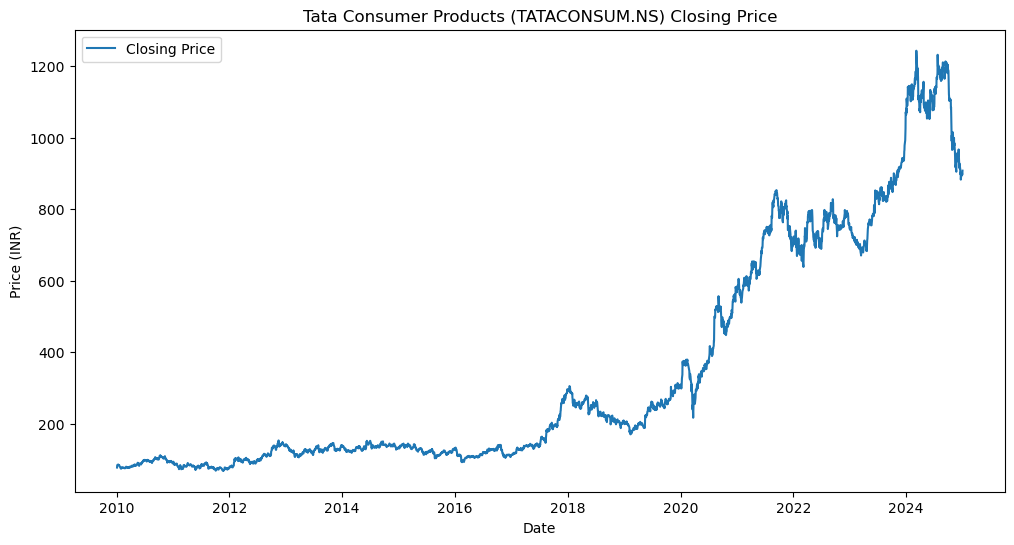

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Closing Price")
plt.title("Tata Consumer Products (TATACONSUM.NS) Closing Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.show()

In [13]:
# Ensure Close is a Series
df['Close'] = df['Close'].squeeze()

In [15]:
print(type(df['Tomorrow']))
print(type(df['Close']))

KeyError: 'Tomorrow'

In [17]:
df['Tomorrow'] = df['Close'].shift(-1)

In [195]:
df

Price,Close,High,Low,Open,Volume,Tomorrow
Ticker,TATACONSUM.NS,TATACONSUM.NS,TATACONSUM.NS,TATACONSUM.NS,TATACONSUM.NS,
Date,,,,,,
2010-01-04,76.870995,77.336632,76.053087,76.526824,952740,NaN
2010-01-05,82.831200,85.220130,77.012726,77.336650,7061550,NaN
2010-01-06,84.126884,84.900246,81.320897,83.572162,2960980,NaN
2010-01-07,84.422470,86.487483,83.653155,85.021726,3807800,NaN
2010-01-08,84.843552,87.034083,84.309082,84.786865,2940330,NaN
...,...,...,...,...,...,...
2024-12-24,900.625061,906.233519,890.202309,898.292374,1038280,NaN
2024-12-26,894.321838,904.645291,891.989091,901.319960,595956,NaN


In [197]:
print(df[['Close', 'Tomorrow']].head())

Price              Close Tomorrow
Ticker     TATACONSUM.NS         
Date                             
2010-01-04     76.870995      NaN
2010-01-05     82.831200      NaN
2010-01-06     84.126884      NaN
2010-01-07     84.422470      NaN
2010-01-08     84.843552      NaN


In [203]:
df['Target'] = (df['Tomorrow']> df['Close']).astype(int)

ValueError: Operands are not aligned. Do `left, right = left.align(right, axis=1, copy=False)` before operating.

In [205]:
print(type(df['Tomorrow']))
print(type(df['Close']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
